In [83]:
import crystal_toolkit
import os
from pymatgen.core import Structure

In [84]:
cif_name = "gen_4"

struct_expt = Structure.from_file(
    os.path.join("cif", f"{cif_name}.cif")
)
print(struct_expt)

struct_expt

Full Formula (Li1 Ta1 F6)
Reduced Formula: LiTaF6
abc   :   5.347638   5.345163   5.574869
angles:  89.825054  61.282276  59.840687
pbc   :       True       True       True
Sites (8)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Li    0.888695  0.473844  0.384031
  1  Ta    0.889038  0.973455  0.883843
  2  F     0.978749  0.125951  0.123732
  3  F     0.977566  0.216557  0.643638
  4  F     0.800746  0.731172  0.124537
  5  F     0.799183  0.821489  0.644242
  6  F     0.405775  0.304819  0.123437
  7  F     0.372201  0.642512  0.644558


In [85]:
# get reduced formula
reduced_formula = struct_expt.composition.reduced_formula

# mkdir in output folder named reduced_formula
os.makedirs(f"output/{reduced_formula}", exist_ok=True)

## pbe

In [86]:
# Relax with pbe

import matcalc

calculator_pbe = matcalc.load_fp("pbe")
relax_calc = matcalc.RelaxCalc( # type: ignore
    calculator_pbe,
    optimizer="FIRE",
    relax_atoms=True,
    relax_cell=True
)

data = relax_calc.calc(struct_expt)


In [87]:
final_structure_pbe = data['final_structure']
print(final_structure_pbe)
final_structure_pbe

Full Formula (Li1 Ta1 F6)
Reduced Formula: LiTaF6
abc   :   5.347638   5.345163   5.574869
angles:  89.825054  61.282276  59.840687
pbc   :       True       True       True
Sites (8)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Li    0.888695  0.473844  0.384031
  1  Ta    0.889038  0.973455  0.883843
  2  F     0.978749  0.125951  0.123732
  3  F     0.977566  0.216557  0.643638
  4  F     0.800746  0.731172  0.124537
  5  F     0.799183  0.821489  0.644242
  6  F     0.405775  0.304819  0.123437
  7  F     0.372201  0.642512  0.644558


In [88]:
phonon_calc = matcalc.PhononCalc( # type: ignore
    calculator_pbe,
    relax_structure=True,
    write_band_structure=f"output/{reduced_formula}/pbe_phonon_bs.yaml",
    write_total_dos=f"output/{reduced_formula}/pbe_phonon_dos.dat",
    write_phonon=f"output/{reduced_formula}/pbe_phonon.yaml",
    optimizer="FIRE",
)

data_phonon_pbe = phonon_calc.calc(final_structure_pbe)

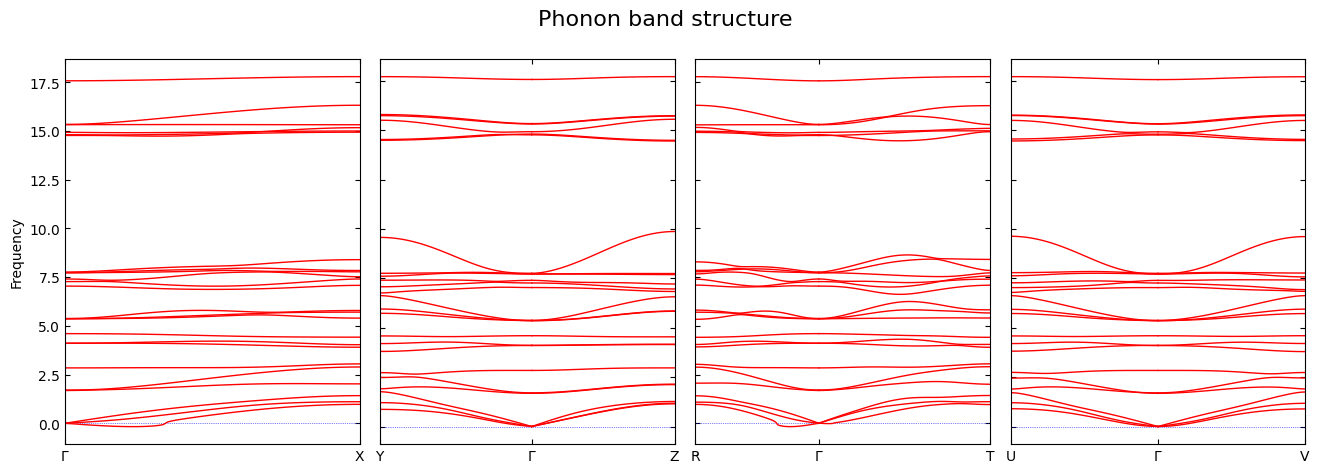

In [89]:
import matplotlib.pyplot as plt

phonon_bs = data_phonon_pbe['phonon'].band_structure

n_axes = sum(1 for c in phonon_bs.path_connections if not c)

fig, axs = plt.subplots(1, n_axes, figsize=(16, 5))

if n_axes == 1:
    axs = [axs]

for ax in axs[1:]:
    ax.set_ylabel('')
    ax.tick_params(axis='y', labelleft=False)

phonon_bs.plot(ax=axs)
fig.suptitle("Phonon band structure", fontsize=16)
plt.subplots_adjust(wspace=0.07)
plt.show()


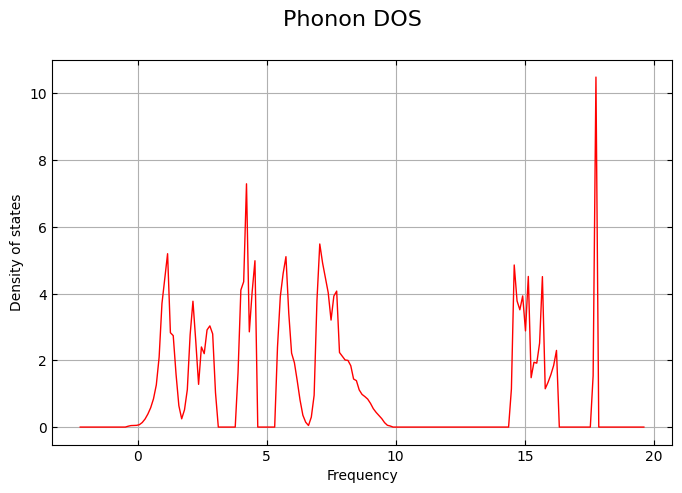

In [90]:
phonon_dos = data_phonon_pbe["phonon"].total_dos

fig, ax = plt.subplots(figsize=(8, 5))
phonon_dos.plot(ax=ax)
fig.suptitle("Phonon DOS", fontsize=16)
plt.show()

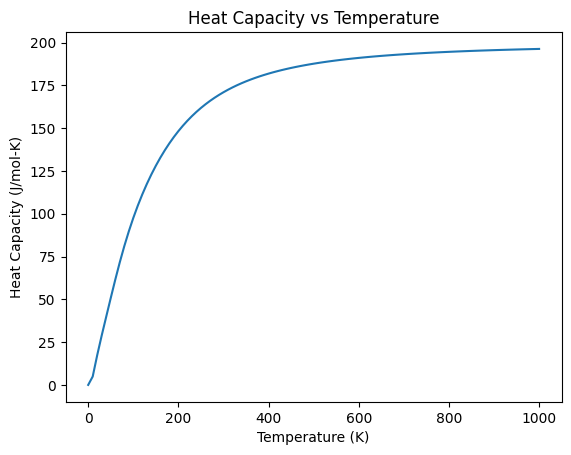

In [91]:
plt.plot(
    data_phonon_pbe['thermal_properties']['temperatures'],
    data_phonon_pbe['thermal_properties']['heat_capacity']
)

plt.xlabel("Temperature (K)")
plt.ylabel('Heat Capacity (J/mol-K)')
plt.title("Heat Capacity vs Temperature")
plt.show()

## r2scan

In [92]:
## Relax with r2scan

import matcalc

calculator_r2scan = matcalc.load_fp("r2scan")
relax_calc = matcalc.RelaxCalc(
    calculator_r2scan,
    optimizer="FIRE",
    relax_atoms=True,
    relax_cell=True
)

data_r2scan = relax_calc.calc(struct_expt)


In [93]:
final_structure_r2scan = data_r2scan['final_structure']
print(final_structure_r2scan)
final_structure_r2scan

Full Formula (Li1 Ta1 F6)
Reduced Formula: LiTaF6
abc   :   5.337543   5.334892   5.563401
angles:  89.825248  61.276496  59.843867
pbc   :       True       True       True
Sites (8)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Li    0.888745  0.473803  0.384013
  1  Ta    0.889008  0.973716  0.883938
  2  F     0.977399  0.126199  0.122451
  3  F     0.975919  0.215297  0.644975
  4  F     0.802318  0.732281  0.123233
  5  F     0.800536  0.821222  0.645481
  6  F     0.408101  0.302163  0.122154
  7  F     0.369928  0.64512   0.645773


In [94]:
phonon_calc = matcalc.PhononCalc( # type: ignore
    calculator_r2scan,
    relax_structure=True,
    write_band_structure=f"output/{reduced_formula}/r2scan_phonon_bs.yaml",
    write_total_dos=f"output/{reduced_formula}/r2scan_phonon_dos.dat",
    write_phonon=f"output/{reduced_formula}/r2scan_phonon.yaml",
    optimizer="FIRE",
)

data_phonon_r2scan = phonon_calc.calc(final_structure_r2scan)

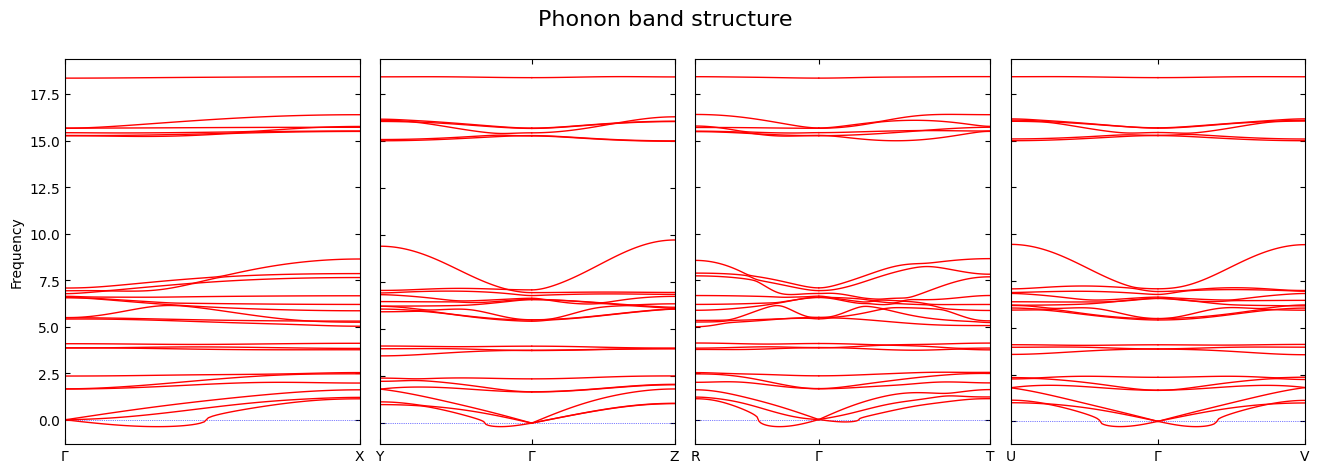

In [95]:
import matplotlib.pyplot as plt

phonon_bs = data_phonon_r2scan['phonon'].band_structure

n_axes = sum(1 for c in phonon_bs.path_connections if not c)

fig, axs = plt.subplots(1, n_axes, figsize=(16, 5))

if n_axes == 1:
    axs = [axs]

for ax in axs[1:]:
    ax.set_ylabel('')
    ax.tick_params(axis='y', labelleft=False)

phonon_bs.plot(ax=axs)
fig.suptitle("Phonon band structure", fontsize=16)
plt.subplots_adjust(wspace=0.07)
plt.show()


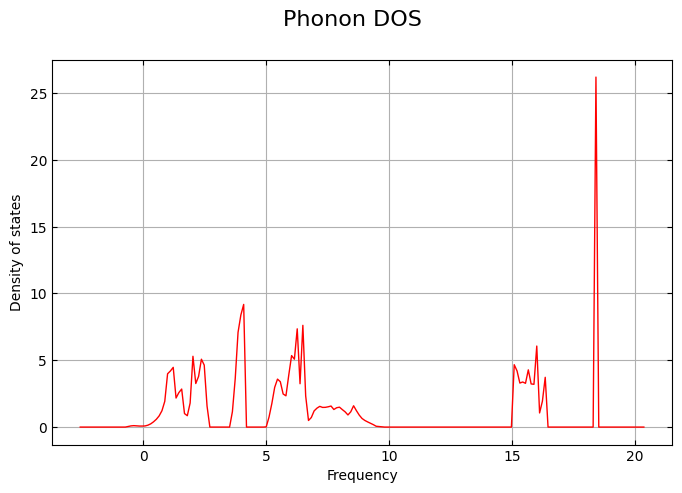

In [96]:
phonon_dos = data_phonon_r2scan["phonon"].total_dos

fig, ax = plt.subplots(figsize=(8, 5))
phonon_dos.plot(ax=ax)
fig.suptitle("Phonon DOS", fontsize=16)
plt.show()

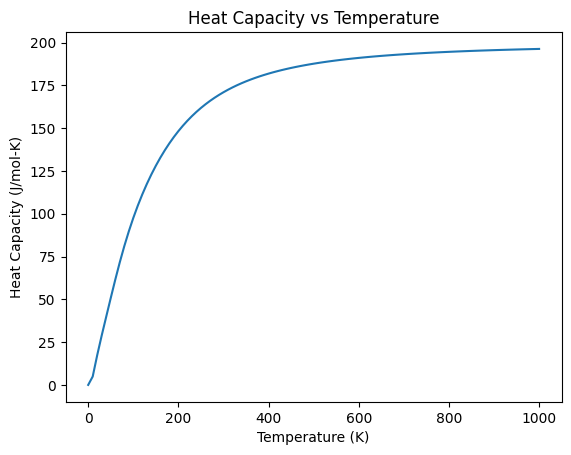

In [97]:
plt.plot(
    data_phonon_pbe['thermal_properties']['temperatures'],
    data_phonon_pbe['thermal_properties']['heat_capacity']
)

plt.xlabel("Temperature (K)")
plt.ylabel('Heat Capacity (J/mol-K)')
plt.title("Heat Capacity vs Temperature")
plt.show()